In [ ]:
import pandas as pd

product_info_path = 'Data/product_info.csv'
product_info_df = pd.read_csv(product_info_path)

In [ ]:
review_files = [
    'Data/reviews_0-250.csv',
    'Data/reviews_250-500.csv',
    'Data/reviews_500-750.csv',
    'Data/reviews_750-1250.csv',
    'Data/reviews_1250-end.csv'
]

In [ ]:
reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)

/tmp/ipykernel_4140/3897885719.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
/tmp/ipykernel_4140/3897885719.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)
/tmp/ipykernel_4140/3897885719.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)


In [ ]:
reviews.drop_duplicates(inplace=True)

In [ ]:
reviews.dropna(inplace=True)

In [ ]:
reviews['price_usd'].fillna(reviews['price_usd'].mean(), inplace=True)

/tmp/ipykernel_4140/2389277462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['price_usd'].fillna(reviews['price_usd'].mean(), inplace=True)


In [ ]:
reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])

In [ ]:
reviews['skin_type'] = reviews['skin_type'].replace({'dryy': 'dry', 'oilyy': 'oily'})

In [ ]:
reviews.drop_duplicates(inplace=True)

In [ ]:
reviews.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
Q1 = reviews['price_usd'].quantile(0.25)
Q3 = reviews['price_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

reviews = reviews[(reviews['price_usd'] >= lower_bound) & (reviews['price_usd'] <= upper_bound)]

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283343 entries, 5 to 1094377
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   author_id                 283343 non-null  object        
 1   rating                    283343 non-null  int64         
 2   is_recommended            283343 non-null  float64       
 3   helpfulness               283343 non-null  float64       
 4   total_feedback_count      283343 non-null  int64         
 5   total_neg_feedback_count  283343 non-null  int64         
 6   total_pos_feedback_count  283343 non-null  int64         
 7   submission_time           283343 non-null  datetime64[ns]
 8   review_text               283343 non-null  object        
 9   review_title              283343 non-null  object        
 10  skin_tone                 283343 non-null  object        
 11  eye_color                 283343 non-null  object        
 12  skin_t

In [ ]:
reviews['review_text']

5          The scent isn’t my favourite but it works grea...
6          I’ll give this 2 stars for nice packaging and ...
8          I love this stuff. I first had the sample size...
9          I purchased the Sweet Candy scent at my local ...
21         Just like  Aquaphor just get something cheaper...
                                 ...                        
1094366    I’ve been taking SuperPower for the past month...
1094367    I love that you have to mix the two items for ...
1094368    I bought this set from drunk elephants website...
1094376    Really good for dry patchy skin!!! My skin has...
1094377    Have used this lotion for two weeks now, skin ...
Name: review_text, Length: 283343, dtype: object

In [ ]:
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Lowercasing, Removing punctuation, Tokenization, Removing stopwords,Lemmatization, Removing numbers, Handling contractions, Removing extra whitespaces

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if not word.isdigit()]

    # Handling contractions
    contractions = {
        "isn't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'd": "who would",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    tokens = [contractions[word] if word in contractions else word for word in tokens]

    tokens = [word.strip() for word in tokens if word.strip()]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


    # Removing HTML tags and URLs: NOT REQUIRED EXAMPLE
    #tokens = [re.sub(r'<[^>]+>', '', word) for word in tokens]
    #tokens = [re.sub(r'http\S+', '', word) for word in tokens]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred):
    """
    Plot confusion matrix with percentages.

    Parameters:
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted labels.
    """
    # Get unique classes from true and predicted labels
    classes = np.unique(np.concatenate((y_true, y_pred)))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate percentages from confusion matrix
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (%)')
    plt.show()

In [ ]:
reviews['sentiment'] = reviews['rating'].apply(lambda x: 'positive' if x in [4, 5] else 'negative')

In [ ]:
reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment
5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
6,6941883808,2,0.0,0.250000,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative
8,7656791726,5,1.0,1.000000,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
9,38727834382,5,1.0,1.000000,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
21,46007186639,1,0.0,0.727273,11,3,8,2023-03-14,Just like Aquaphor just get something cheaper...,Overrated!,fair,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative


In [ ]:
positive_reviews_count = len(reviews[reviews['sentiment'] == 'positive'])
negative_reviews_count = len(reviews[reviews['sentiment'] == 'negative'])

print("Number of positive reviews:", positive_reviews_count)
print("Number of negative reviews:", negative_reviews_count)

Number of positive reviews: 207987
Number of negative reviews: 75356


In [ ]:
#Using a balanced dataset for analysis

balanced_positive_reviews = reviews[reviews['sentiment'] == 'positive'].sample(n=negative_reviews_count, random_state=42)
balanced_negative_reviews = reviews[reviews['sentiment'] == 'negative']
balanced_reviews = pd.concat([balanced_positive_reviews, balanced_negative_reviews])

balanced_reviews = balanced_reviews.sample(frac=1, random_state=42).reset_index(drop=True)

print(len(balanced_reviews[balanced_reviews['sentiment'] == 'positive']))
print(len(balanced_reviews[balanced_reviews['sentiment'] == 'negative']))

75356
75356


In [ ]:
balanced_reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment
0,8129903533,3,1.0,0.666667,3,1,2,2019-08-16,I have combination skin. some days my skin is ...,good not great,light,brown,combination,auburn,P472453,Vinosource-Hydra SOS Intense Hydration Moistur...,Caudalie,45.0,negative
1,6152123858,5,1.0,1.000000,7,0,7,2022-05-20,I love this bronzer. I’ve tried other bronzers...,Love!,light,green,normal,brown,P407381,Sun-Kissed Face Gelee Complexion Multitasker B...,CLINIQUE,34.0,positive
2,7485873819,5,1.0,1.000000,2,0,2,2021-03-29,i am so in love with this face wash!!! i recen...,the BEST!,fair,brown,normal,brown,P441644,Mini Superfood Antioxidant Cleanser,Youth To The People,14.0,positive
3,32806875124,5,1.0,1.000000,1,0,1,2021-08-03,Love it. Contain Lots of natural ingredients l...,Glowy skin,rich,brown,oily,black,P471101,Resurface+ AHA/BHA Niacinamide Exfoliating Pad...,Skinfix,50.0,positive
4,7691570320,5,1.0,1.000000,2,0,2,2020-04-13,This product gives you the best deep clean yet...,Amazing!,lightMedium,green,combination,brown,P426340,The Rice Polish Foaming Enzyme Powder,Tatcha,68.0,positive


In [ ]:
clean_review_text = balanced_reviews['review_text']
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, preprocessor=preprocess_text)
X = tfidf_vectorizer.fit_transform(clean_review_text)
y = balanced_reviews['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Training a logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

Accuracy: 0.8891948379391567
Classification Report:


              precision    recall  f1-score   support

    negative       0.89      0.89      0.89     15038
    positive       0.89      0.89      0.89     15105

    accuracy                           0.89     30143
   macro avg       0.89      0.89      0.89     30143
weighted avg       0.89      0.89      0.89     30143



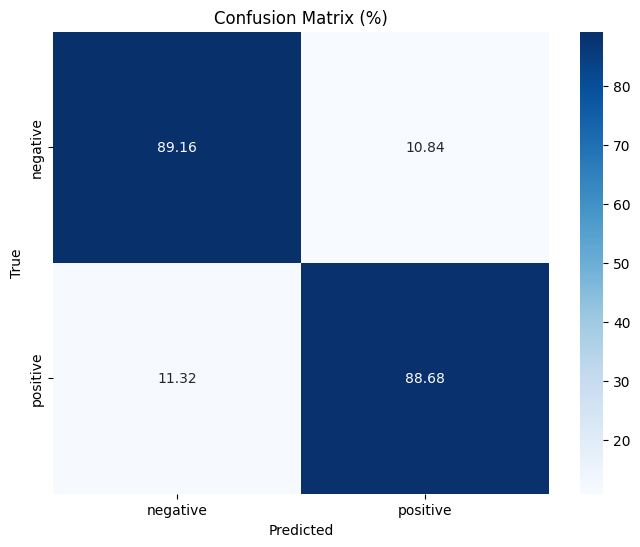

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test,y_pred)

In [ ]:
#Alternate text representation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1000, preprocessor=preprocess_text)
X = count_vectorizer.fit_transform(clean_review_text)
y = balanced_reviews['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Training a logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

Accuracy: 0.871744683674485
Classification Report:


              precision    recall  f1-score   support

    negative       0.87      0.88      0.87     15038
    positive       0.88      0.87      0.87     15105

    accuracy                           0.87     30143
   macro avg       0.87      0.87      0.87     30143
weighted avg       0.87      0.87      0.87     30143



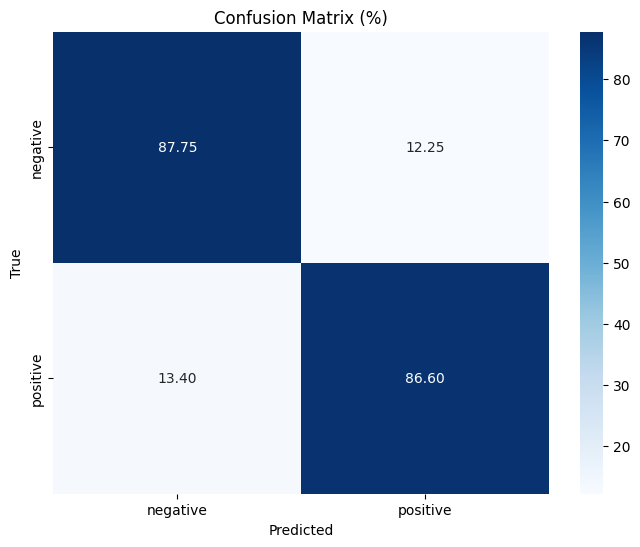

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test,y_pred)

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader

#Load pre trained glove model from Gensim
w2v_model = gensim.downloader.load('glove-wiki-gigaword-100')

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
#Inspect the model
word2vec_vocab = w2v_model.key_to_index
# inspect the # of words in the pre-trained model
print(len(word2vec_vocab))
# randomly pick a word 'dog' to inspect the vector dimension of the pre-trained model
print(len(w2v_model['dog']))

400000
100


In [ ]:
#pre-processing imports
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
mystopwords = set(stopwords.words("english"))
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatized = []
wn = WordNetLemmatizer()

def preprocess_corpus(texts):
    def remove_stops_digits(tokens):
        #Nested function that lowercases, removes stopwords and digits from a list of tokens
        tokens_new = [wn.lemmatize(word) for word in tokens ]
        return [token.lower() for token in tokens_new if token.lower() not in mystopwords and not token.isdigit()
               and token not in punctuation]
    #This return statement below uses the above function to process twitter tokenizer output further.
    return [remove_stops_digits(word_tokenize(text)) for text in texts]

In [ ]:
texts = balanced_reviews['review_text'].values.tolist()
sentiments = balanced_reviews['sentiment'].values.tolist()

In [ ]:
len(texts)

150712

In [ ]:
texts_processed = preprocess_corpus(texts)
print(len(sentiments), len(texts_processed))
print(texts_processed[1])
print(sentiments[1])

150712 150712
['love', 'bronzer', '’', 'tried', 'bronzers', 'always', 'end', 'going', 'back', 'one', 'little', 'go', 'long', 'way', 'definitely', 'need', 'blended', 'immediately', 'applied', 'skin', 'stain', 'look', 'blended', 'natural', 'applied', 'properly', 'bronzer', 'best', 'make', 'skin', 'look', 'naturally', 'sun', 'kissed']
positive


In [ ]:
import numpy as np

# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 100
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0 + 1e-5 # to avoid divide-by-zero
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        if(count_for_this!=0):
            feats.append(feat_for_this/count_for_this)
        else:
            feats.append(zero_vector)
    return feats


train_vectors = embedding_feats(texts_processed)
print(len(train_vectors))

150712


In [ ]:
#Take any classifier (LogisticRegression here, and train/test it like before)
train_data, test_data, train_sentiments, test_sentiments = train_test_split(train_vectors, sentiments, random_state=42)

classifier = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0)
classifier.fit(train_data, train_sentiments)
preds = classifier.predict(test_data)

              precision    recall  f1-score   support

    negative       0.76      0.77      0.76     18863
    positive       0.76      0.75      0.76     18815

    accuracy                           0.76     37678
   macro avg       0.76      0.76      0.76     37678
weighted avg       0.76      0.76      0.76     37678



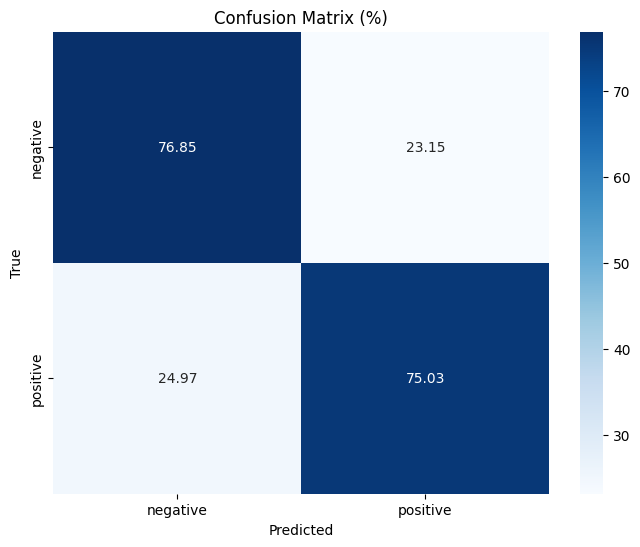

In [ ]:
print(classification_report(test_sentiments, preds))
plot_confusion_matrix(test_sentiments,preds)

In [ ]:
#TFIDF using random forest
clean_review_text = balanced_reviews['review_text']

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000, preprocessor=preprocess_text)
X = tfidf_vectorizer.fit_transform(clean_review_text)
y = balanced_reviews['sentiment']

Accuracy (Random Forest): 0.881133264771257
Classification Report (Random Forest):
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     15038
    positive       0.88      0.88      0.88     15105

    accuracy                           0.88     30143
   macro avg       0.88      0.88      0.88     30143
weighted avg       0.88      0.88      0.88     30143



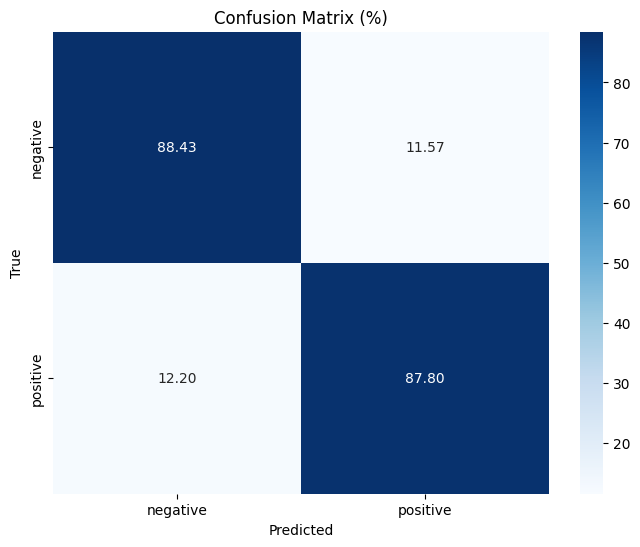

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf)

In [ ]:
print('done')

done


### STOP

In [ ]:
# from sklearn.svm import SVC

# # svm_model = SVC()
# svm_model = SVC(verbose=True)
# svm_model.fit(X_train, y_train)

# y_pred_svm = svm_model.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("Accuracy (SVM):", accuracy_svm)
# print("Classification Report (SVM):")
# print(classification_report(y_test, y_pred_svm))

# plot_confusion_matrix(y_test, y_pred_svm)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


Accuracy (Random Forest): 0.8670669807252098
Classification Report (Random Forest):
              precision    recall  f1-score   support

    negative       0.86      0.87      0.87     15038
    positive       0.87      0.86      0.87     15105

    accuracy                           0.87     30143
   macro avg       0.87      0.87      0.87     30143
weighted avg       0.87      0.87      0.87     30143



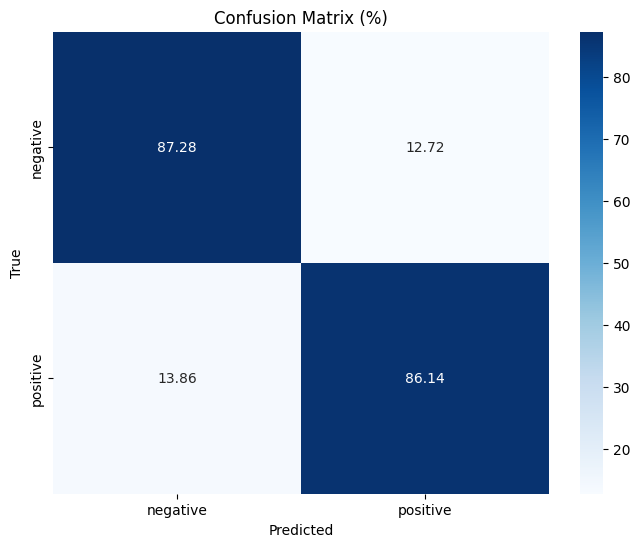

In [ ]:
#Alternate text representation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1000, preprocessor=preprocess_text)
X = count_vectorizer.fit_transform(clean_review_text)
y = balanced_reviews['sentiment']

from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(verbose=True)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf)

In [ ]:
# from sklearn.svm import SVC

# svm_model = SVC(verbose=True)
# svm_model.fit(X_train, y_train)

# y_pred_svm = svm_model.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("Accuracy (SVM):", accuracy_svm)
# print("Classification Report (SVM):")
# print(classification_report(y_test, y_pred_svm))

# plot_confusion_matrix(y_test, y_pred_svm)

In [ ]:
#Take any classifier (LogisticRegression here, and train/test it like before)
train_vectors = embedding_feats(texts_processed)
train_data, test_data, train_sentiments, test_sentiments = train_test_split(train_vectors, sentiments, random_state=42)

# classifier = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0)
# classifier.fit(train_data, train_sentiments)
# preds = classifier.predict(test_data)
# print(classification_report(test_sentiments, preds))
# plot_confusion_matrix(test_sentiments,preds)

In [ ]:
# from sklearn.svm import SVC

# svm_classifier = SVC()
# svm_classifier.fit(train_data, train_sentiments)
# svm_preds = svm_classifier.predict(test_data)

# print(classification_report(test_sentiments, svm_preds))
# plot_confusion_matrix(test_sentiments,svm_preds)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


              precision    recall  f1-score   support

    negative       0.76      0.80      0.78     18863
    positive       0.79      0.75      0.77     18815

    accuracy                           0.77     37678
   macro avg       0.77      0.77      0.77     37678
weighted avg       0.77      0.77      0.77     37678



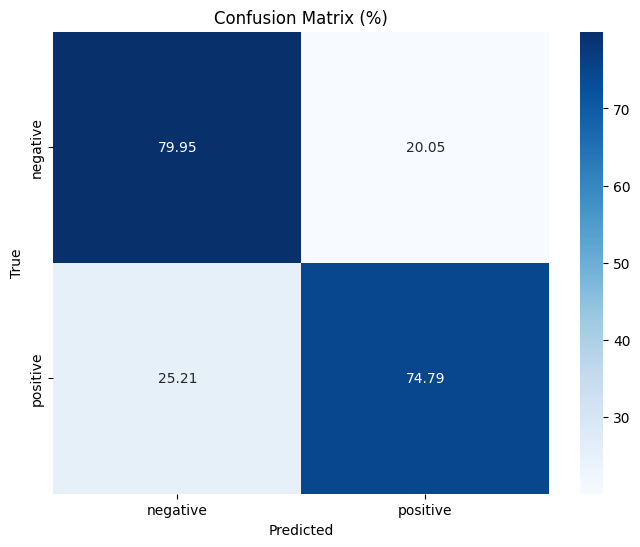

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(verbose=True)
rf_classifier.fit(train_data, train_sentiments)
rf_preds = rf_classifier.predict(test_data)


print(classification_report(test_sentiments, rf_preds))
plot_confusion_matrix(test_sentiments,rf_preds)